In [23]:
import pickle
import networkx as nx

# Charger et inspecter le pickle
pickle_path = "../data/03_primary/network_graph.pkl"

with open(pickle_path, 'rb') as f:
    loaded_data = pickle.load(f)

print(" CONTENU DU PICKLE :")
print(f"Type : {type(loaded_data)}")

if isinstance(loaded_data, nx.Graph):
    print(" C'est un graphe NetworkX")
    print(f"Nœuds : {loaded_data.number_of_nodes()}")
    print(f"Arêtes : {loaded_data.number_of_edges()}")
    
    # Regarder 3 nœuds
    print("\n EXEMPLES DE NŒUDS :")
    for i, (node_id, attrs) in enumerate(list(loaded_data.nodes(data=True))[:3]):
        print(f"Nœud {node_id} : {attrs}")
    
    # Regarder 3 arêtes  
    print("\n EXEMPLES D'ARÊTES :")
    for i, (u, v, attrs) in enumerate(list(loaded_data.edges(data=True))[:3]):
        print(f"Arête {u}→{v} : {attrs}")

else:
    print(" Ce n'est pas un graphe NetworkX")
    print(f"Contenu : {loaded_data}")

 CONTENU DU PICKLE :
Type : <class 'networkx.classes.multidigraph.MultiDiGraph'>
 C'est un graphe NetworkX
Nœuds : 145341
Arêtes : 678839

 EXEMPLES DE NŒUDS :
Nœud 0 : {'label': '', 'node_type': 1, 'packet_id': 0}
Nœud 1 : {'label': '10.100.200.16', 'node_type': 2, 'packet_id': 0}
Nœud 2 : {'label': '10.100.200.4', 'node_type': 2, 'packet_id': 0}

 EXEMPLES D'ARÊTES :
Arête 0→1 : {'label': 'ip_src'}
Arête 0→2 : {'label': 'ip_dst'}
Arête 0→3 : {'label': 'ts'}


 GRAPHE CHARGÉ AVEC SUCCÈS
Type: <class 'networkx.classes.multidigraph.MultiDiGraph'>
Nombre de nœuds: 145341
Nombre d'arêtes: 678839
Dirigé: True
Multi-graphe: True

  ANALYSE DES NŒUDS
Attributs des nœuds trouvés: ['label', 'node_type', 'packet_id']

Distribution des types de nœuds:
  - CENTRAL: 54791 nœuds (37.7%)
  - PARAMETER: 90550 nœuds (62.3%)

 ÉCHANTILLONS DE NŒUDS (5 premiers):
  Nœud 0: {'label': '', 'node_type': 1, 'packet_id': 0}
  Nœud 1: {'label': '10.100.200.16', 'node_type': 2, 'packet_id': 0}
  Nœud 2: {'label': '10.100.200.4', 'node_type': 2, 'packet_id': 0}
  Nœud 3: {'label': '1751833569.358106', 'node_type': 2, 'packet_id': 0}
  Nœud 4: {'label': 'POST', 'node_type': 2, 'packet_id': 0}

 ANALYSE DES LABELS:
  - Labels non-vides: 90550
  - Labels vides: 54791
  - Longueur moyenne des labels: 18.5
  - Label le plus long: 99 caractères

 ANALYSE DES ARÊTES
Attributs des arêtes trouvés: ['label']

Distribution des labels d'arêtes (top 10):
  - 'ip_src': 81000 arêtes 

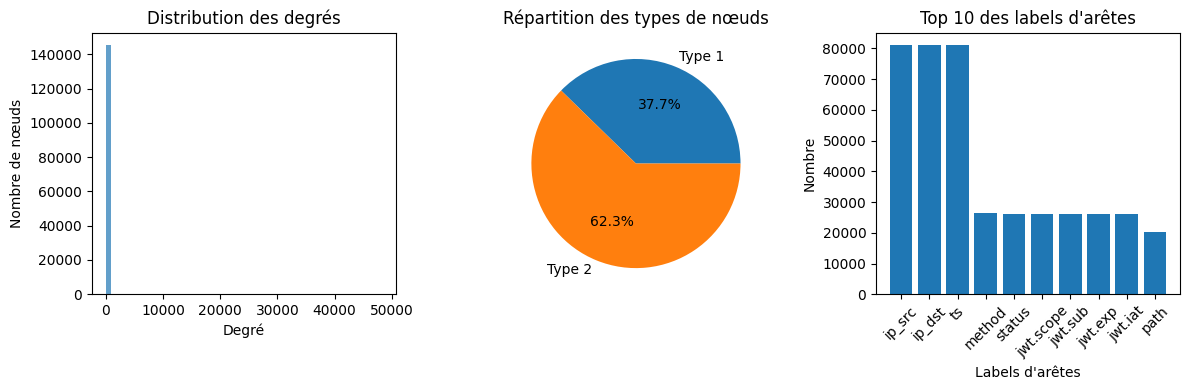


 INSPECTION TERMINÉE!


In [6]:
# ========================================
# NOTEBOOK - Inspection du graphe pickle
# ========================================

import pickle
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# ========================================
# 1. CHARGER LE GRAPHE
# ========================================

# Charger le graphe depuis le pickle
pickle_path = "../data/03_primary/network_graph.pkl"

with open(pickle_path, 'rb') as f:
    graph = pickle.load(f)

print(" GRAPHE CHARGÉ AVEC SUCCÈS")
print(f"Type: {type(graph)}")
print(f"Nombre de nœuds: {graph.number_of_nodes()}")
print(f"Nombre d'arêtes: {graph.number_of_edges()}")
print(f"Dirigé: {graph.is_directed()}")
print(f"Multi-graphe: {graph.is_multigraph()}")

# ========================================
# 2. INSPECTER LA STRUCTURE DES NŒUDS
# ========================================

print("\n" + "="*50)
print("  ANALYSE DES NŒUDS")
print("="*50)

# Collecter tous les attributs des nœuds
all_node_attrs = set()
node_types = []
node_labels = []

for node_id, attrs in graph.nodes(data=True):
    all_node_attrs.update(attrs.keys())
    node_types.append(attrs.get('node_type', 'Unknown'))
    node_labels.append(attrs.get('label', ''))

print(f"Attributs des nœuds trouvés: {sorted(all_node_attrs)}")

# Compter les types de nœuds
type_counts = Counter(node_types)
print(f"\nDistribution des types de nœuds:")
for node_type, count in type_counts.items():
    type_name = "CENTRAL" if node_type == 1 else "PARAMETER" if node_type == 2 else f"UNKNOWN({node_type})"
    print(f"  - {type_name}: {count} nœuds ({count/len(node_types)*100:.1f}%)")

# Échantillons de nœuds
print(f"\n ÉCHANTILLONS DE NŒUDS (5 premiers):")
for i, (node_id, attrs) in enumerate(graph.nodes(data=True)):
    if i < 5:
        print(f"  Nœud {node_id}: {attrs}")
        
# Analyse des labels des nœuds
print(f"\n ANALYSE DES LABELS:")
label_lengths = [len(str(label)) for label in node_labels if label]
print(f"  - Labels non-vides: {len([l for l in node_labels if l])}")
print(f"  - Labels vides: {len([l for l in node_labels if not l])}")
if label_lengths:
    print(f"  - Longueur moyenne des labels: {sum(label_lengths)/len(label_lengths):.1f}")
    print(f"  - Label le plus long: {max(label_lengths)} caractères")

# ========================================
# 3. INSPECTER LA STRUCTURE DES ARÊTES
# ========================================

print("\n" + "="*50)
print(" ANALYSE DES ARÊTES")
print("="*50)

# Collecter tous les attributs des arêtes
all_edge_attrs = set()
edge_labels = []

for u, v, attrs in graph.edges(data=True):
    all_edge_attrs.update(attrs.keys())
    edge_labels.append(attrs.get('label', ''))

print(f"Attributs des arêtes trouvés: {sorted(all_edge_attrs)}")

# Compter les types d'arêtes (labels)
edge_label_counts = Counter(edge_labels)
print(f"\nDistribution des labels d'arêtes (top 10):")
for label, count in edge_label_counts.most_common(10):
    print(f"  - '{label}': {count} arêtes ({count/len(edge_labels)*100:.1f}%)")

# Échantillons d'arêtes
print(f"\n ÉCHANTILLONS D'ARÊTES (5 premiers):")
for i, (u, v, attrs) in enumerate(graph.edges(data=True)):
    if i < 5:
        print(f"  {u} → {v}: {attrs}")

# ========================================
# 4. ANALYSE TOPOLOGIQUE
# ========================================

print("\n" + "="*50)
print("  ANALYSE TOPOLOGIQUE")
print("="*50)

# Statistiques de connectivité
degrees = dict(graph.degree())
in_degrees = dict(graph.in_degree()) if graph.is_directed() else {}
out_degrees = dict(graph.out_degree()) if graph.is_directed() else {}

print(f"Degré moyen: {sum(degrees.values())/len(degrees):.2f}")
print(f"Degré maximum: {max(degrees.values())}")
print(f"Nœuds isolés: {len([n for n, d in degrees.items() if d == 0])}")

if graph.is_directed():
    print(f"Degré entrant moyen: {sum(in_degrees.values())/len(in_degrees):.2f}")
    print(f"Degré sortant moyen: {sum(out_degrees.values())/len(out_degrees):.2f}")

# Densité du graphe
density = nx.density(graph)
print(f"Densité du graphe: {density:.6f}")

# Composantes connexes
if graph.is_directed():
    num_components = nx.number_weakly_connected_components(graph)
    print(f"Composantes faiblement connexes: {num_components}")
else:
    num_components = nx.number_connected_components(graph)
    print(f"Composantes connexes: {num_components}")

# ========================================
# 5. VALIDATION DES DONNÉES 5G
# ========================================

print("\n" + "="*50)
print(" VALIDATION DONNÉES 5G")
print("="*50)

# Chercher des patterns typiques 5G/réseau
network_indicators = {
    'IP addresses': 0,
    'Ports': 0,
    'Protocols': 0,
    'HTTP/2 related': 0,
    'Other': 0
}

for label in node_labels:
    label_str = str(label).lower()
    if any(x in label_str for x in ['ip_src', 'ip_dst', '192.', '10.', '172.', 'addr']):
        network_indicators['IP addresses'] += 1
    elif any(x in label_str for x in ['port', '80', '443', '8080']):
        network_indicators['Ports'] += 1
    elif any(x in label_str for x in ['tcp', 'udp', 'http', 'protocol']):
        network_indicators['Protocols'] += 1
    elif any(x in label_str for x in ['stream', 'http2', 'h2']):
        network_indicators['HTTP/2 related'] += 1
    else:
        network_indicators['Other'] += 1

print("Indicateurs réseau trouvés:")
for indicator, count in network_indicators.items():
    if count > 0:
        print(f"  - {indicator}: {count}")

# ========================================
# 6. VÉRIFICATION DE LA PROPRETÉ
# ========================================

print("\n" + "="*50)
print(" VÉRIFICATION DE LA PROPRETÉ")
print("="*50)

# Vérifier qu'il n'y a pas d'attributs de visualisation
visualization_attrs = ['color', 'mass', 'size', 'x', 'y']
found_viz_attrs = []

for node_id, attrs in graph.nodes(data=True):
    for viz_attr in visualization_attrs:
        if viz_attr in attrs:
            found_viz_attrs.append(viz_attr)
            break
    if found_viz_attrs:  # Arrêter après le premier trouvé
        break

if found_viz_attrs:
    print(f"  ATTENTION: Attributs de visualisation trouvés: {found_viz_attrs}")
    print("   Le graphe n'est pas complètement propre!")
else:
    print(" GRAPHE PROPRE: Aucun attribut de visualisation trouvé")

# ========================================
# 7. RÉSUMÉ POUR LA VECTORISATION
# ========================================

print("\n" + "="*50)
print(" RÉSUMÉ POUR VECTORISATION")
print("="*50)

print(f" Graphe prêt pour vectorisation:")
print(f"   - {graph.number_of_nodes()} nœuds à vectoriser")
print(f"   - {graph.number_of_edges()} arêtes à vectoriser")
print(f"   - {len(type_counts)} types de nœuds différents")
print(f"   - {len(edge_label_counts)} types d'arêtes différents")

unique_node_labels = len(set(node_labels))
unique_edge_labels = len(set(edge_labels))
print(f"   - {unique_node_labels} labels de nœuds uniques")
print(f"   - {unique_edge_labels} labels d'arêtes uniques")

# ========================================
# 8. VISUALISATION RAPIDE 
# ========================================

print("\n" + "="*50)
print(" VISUALISATION DES STATISTIQUES")
print("="*50)

# Graphique des degrés
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
degree_values = list(degrees.values())
plt.hist(degree_values, bins=min(50, len(set(degree_values))), alpha=0.7)
plt.title('Distribution des degrés')
plt.xlabel('Degré')
plt.ylabel('Nombre de nœuds')

plt.subplot(1, 3, 2)
type_names = [f"Type {t}" for t in type_counts.keys()]
plt.pie(type_counts.values(), labels=type_names, autopct='%1.1f%%')
plt.title('Répartition des types de nœuds')

plt.subplot(1, 3, 3)
top_edge_labels = edge_label_counts.most_common(10)
if top_edge_labels:
    labels, counts = zip(*top_edge_labels)
    plt.bar(range(len(labels)), counts)
    plt.title('Top 10 des labels d\'arêtes')
    plt.xlabel('Labels d\'arêtes')
    plt.ylabel('Nombre')
    plt.xticks(range(len(labels)), labels, rotation=45)

plt.tight_layout()
plt.show()

print("\n INSPECTION TERMINÉE!")


 STATISTIQUES DES DEGRÉS:
   - Degré minimum: 1
   - Degré maximum: 48296
   - Degré médian: 1.0
   - Degré moyen: 9.34


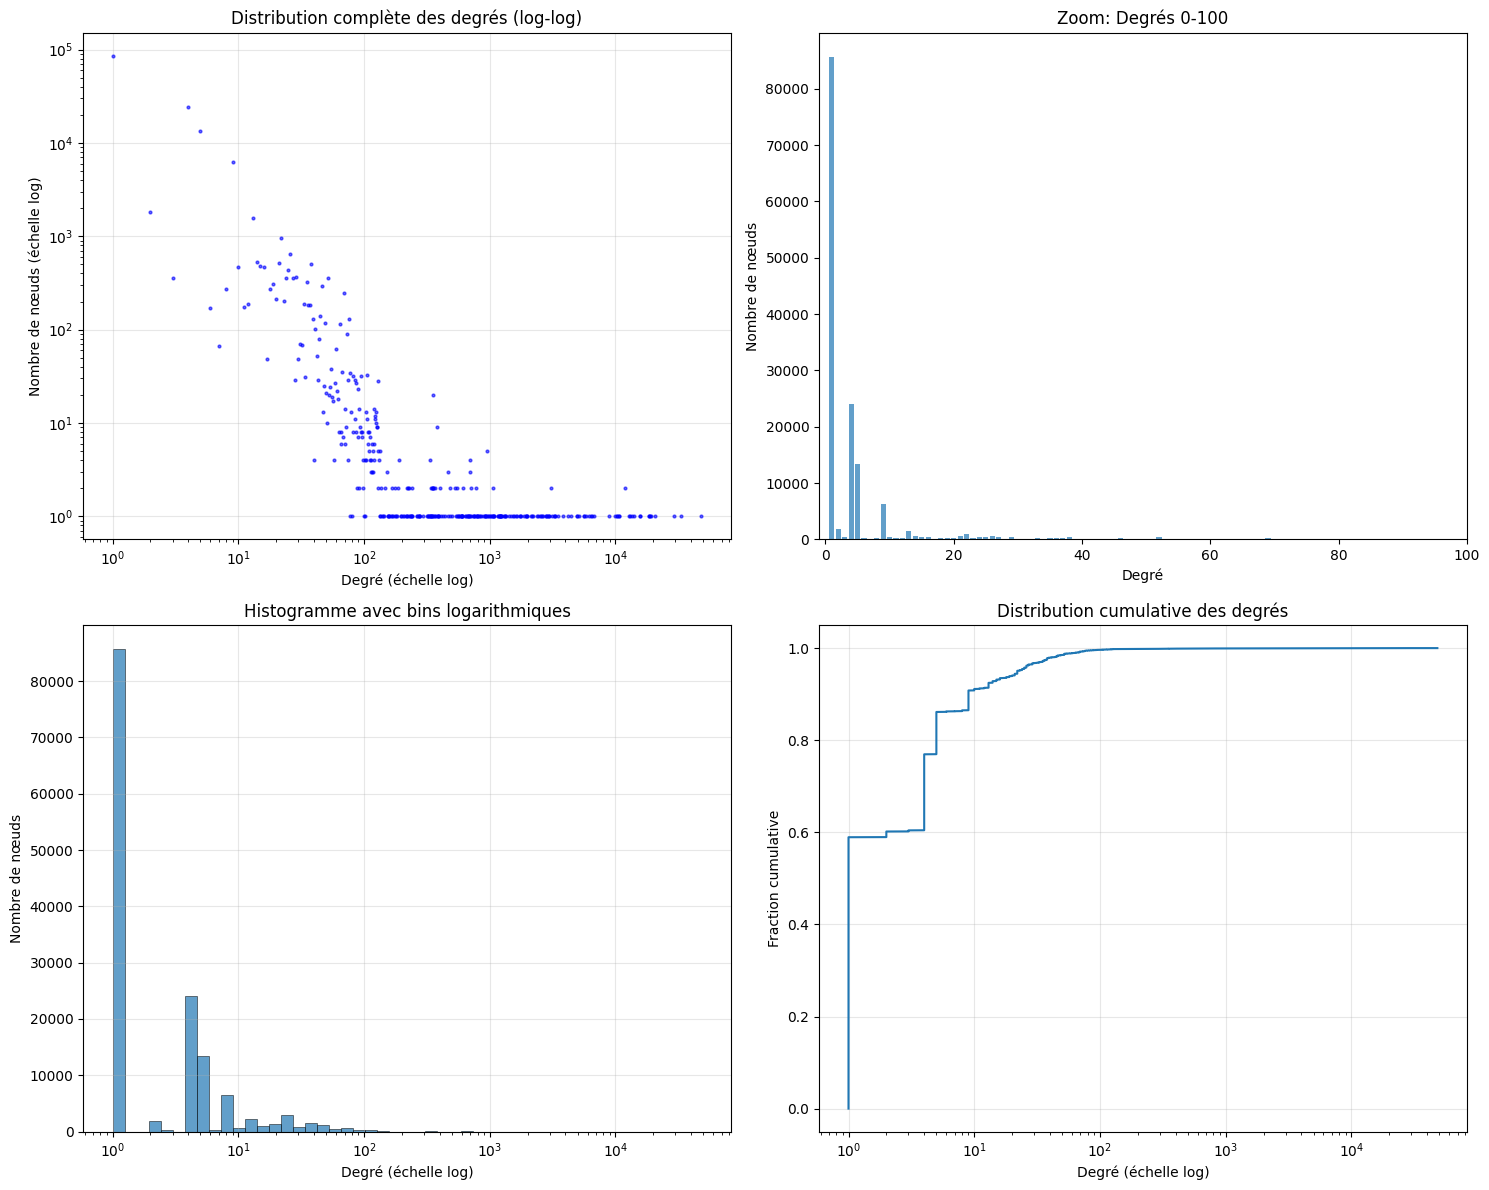


 ANALYSE PAR TRANCHES DE DEGRÉS:
   - Degré 0-1: 85,652 nœuds (58.9%)
   - Degré 2-10: 46,785 nœuds (32.2%)
   - Degré 11-50: 10,745 nœuds (7.4%)
   - Degré 51-100: 1,608 nœuds (1.1%)
   - Degré 101-500: 395 nœuds (0.3%)
   - Degré 501-1000: 63 nœuds (0.0%)
   - Degré 1001-5000: 63 nœuds (0.0%)
   - Degré 5000+: 30 nœuds (0.0%)

 TOP 10 DES NŒUDS LES PLUS CONNECTÉS:
   1. Nœud 2 (PARAMETER): 48296 connexions
      Label: '10.100.200.4'
   2. Nœud 478 (PARAMETER): 33191 connexions
      Label: '10.100.200.8'
   3. Nœud 1 (PARAMETER): 29365 connexions
      Label: '10.100.200.16'
   4. Nœud 8 (PARAMETER): 20437 connexions
      Label: '200'
   5. Nœud 87 (CENTRAL): 19260 connexions
      Label: ''
   6. Nœud 79 (PARAMETER): 18666 connexions
      Label: '10.100.200.10'
   7. Nœud 4 (PARAMETER): 18452 connexions
      Label: 'POST'
   8. Nœud 28 (PARAMETER): 18329 connexions
      Label: 'REGISTERED'
   9. Nœud 65 (PARAMETER): 15786 connexions
      Label: '1'
   10. Nœud 492 (CENTRAL): 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Récupérer les degrés
degrees = dict(graph.degree())
degree_values = list(degrees.values())

print(f" STATISTIQUES DES DEGRÉS:")
print(f"   - Degré minimum: {min(degree_values)}")
print(f"   - Degré maximum: {max(degree_values)}")
print(f"   - Degré médian: {np.median(degree_values)}")
print(f"   - Degré moyen: {np.mean(degree_values):.2f}")

# Compter la fréquence de chaque degré
degree_counter = Counter(degree_values)
degrees_sorted = sorted(degree_counter.keys())
counts = [degree_counter[d] for d in degrees_sorted]

# ========================================
# PLUSIEURS VISUALISATIONS
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution complète (échelle log-log)
axes[0,0].loglog(degrees_sorted, counts, 'bo', markersize=2, alpha=0.6)
axes[0,0].set_xlabel('Degré (échelle log)')
axes[0,0].set_ylabel('Nombre de nœuds (échelle log)')
axes[0,0].set_title('Distribution complète des degrés (log-log)')
axes[0,0].grid(True, alpha=0.3)

# 2. Zoom sur les degrés faibles (0-100)
low_degrees = [d for d in degrees_sorted if d <= 100]
low_counts = [degree_counter[d] for d in low_degrees]

axes[0,1].bar(low_degrees, low_counts, width=0.8, alpha=0.7)
axes[0,1].set_xlabel('Degré')
axes[0,1].set_ylabel('Nombre de nœuds')
axes[0,1].set_title('Zoom: Degrés 0-100')
axes[0,1].set_xlim(-1, 100)

# 3. Histogramme avec bins adaptatifs
axes[1,0].hist(degree_values, bins=np.logspace(0, np.log10(max(degree_values)), 50), 
               alpha=0.7, edgecolor='black', linewidth=0.5)
axes[1,0].set_xscale('log')
axes[1,0].set_xlabel('Degré (échelle log)')
axes[1,0].set_ylabel('Nombre de nœuds')
axes[1,0].set_title('Histogramme avec bins logarithmiques')
axes[1,0].grid(True, alpha=0.3)

# 4. Distribution cumulative
sorted_degrees = np.sort(degree_values)
cumulative = np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)

axes[1,1].semilogx(sorted_degrees, cumulative)
axes[1,1].set_xlabel('Degré (échelle log)')
axes[1,1].set_ylabel('Fraction cumulative')
axes[1,1].set_title('Distribution cumulative des degrés')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========================================
# ANALYSE DÉTAILLÉE PAR TRANCHES
# ========================================

print(f"\n ANALYSE PAR TRANCHES DE DEGRÉS:")

# Définir des tranches
ranges = [
    (0, 1, "Degré 0-1"),
    (2, 10, "Degré 2-10"), 
    (11, 50, "Degré 11-50"),
    (51, 100, "Degré 51-100"),
    (101, 500, "Degré 101-500"),
    (501, 1000, "Degré 501-1000"),
    (1001, 5000, "Degré 1001-5000"),
    (5001, float('inf'), "Degré 5000+")
]

for min_deg, max_deg, label in ranges:
    if max_deg == float('inf'):
        count = len([d for d in degree_values if d >= min_deg])
    else:
        count = len([d for d in degree_values if min_deg <= d <= max_deg])
    
    percentage = count / len(degree_values) * 100
    if count > 0:
        print(f"   - {label}: {count:,} nœuds ({percentage:.1f}%)")

# ========================================
# IDENTIFIER LES NŒUDS À HAUT DEGRÉ
# ========================================

print(f"\n TOP 10 DES NŒUDS LES PLUS CONNECTÉS:")

# Trier les nœuds par degré décroissant
nodes_by_degree = sorted([(node_id, degree, graph.nodes[node_id]) 
                         for node_id, degree in degrees.items()], 
                        key=lambda x: x[1], reverse=True)

for i, (node_id, degree, attrs) in enumerate(nodes_by_degree[:10]):
    node_type = "CENTRAL" if attrs['node_type'] == 1 else "PARAMETER"
    label = attrs['label'][:50] + "..." if len(str(attrs['label'])) > 50 else attrs['label']
    print(f"   {i+1}. Nœud {node_id} ({node_type}): {degree} connexions")
    print(f"      Label: '{label}'")

# ========================================
# VALIDATION: Y A-T-IL VRAIMENT DES NŒUDS DE DEGRÉ 0?
# ========================================

zero_degree_nodes = [node_id for node_id, degree in degrees.items() if degree == 0]

print(f"\n VÉRIFICATION DEGRÉS ZÉRO:")
print(f"   - Nœuds de degré 0: {len(zero_degree_nodes)}")

if len(zero_degree_nodes) > 0:
    print(f"     ATTENTION: Des nœuds isolés existent!")
    for i, node_id in enumerate(zero_degree_nodes[:5]):
        attrs = graph.nodes[node_id]
        print(f"      Nœud {node_id}: {attrs}")
else:
    print(f"    Aucun nœud isolé (tous connectés)")

# ========================================
# RÉSUMÉ POUR LE DEBUG
# ========================================

print(f"\n RÉSUMÉ POUR VECTORISATION:")
print(f"   - {len([d for d in degree_values if d <= 10])} nœuds ont degré ≤ 10 ({len([d for d in degree_values if d <= 10])/len(degree_values)*100:.1f}%)")
print(f"   - {len([d for d in degree_values if d > 100])} nœuds ont degré > 100 ({len([d for d in degree_values if d > 100])/len(degree_values)*100:.1f}%)")
print(f"   - Les nœuds très connectés sont probablement des 'hubs' importants")
print(f"   - Distribution scale-free typique des réseaux réels")

 CRÉATION D'UNE VISUALISATION CLAIRE
 ANALYSE DU CONTENU DU GRAPHE
 CATÉGORIES DE DONNÉES TROUVÉES:
   - IPs: 684 éléments
     Exemples: ['10.100.200.16', '10.100.200.4', '10.100.200.6']...
   - Ports: 745 éléments
     Exemples: ['200', '1000', '100']...
   - Methods: 5 éléments
     Exemples: ['POST', 'GET', 'PATCH']...
   - Protocols: 768 éléments
     Exemples: ['http://amf.free5gc.org:8000/namf-callback/v1/am-policy/', 'http://amf.free5gc.org:8000/namf-callback/v1/n1-message-notify', 'http://pcf.free5gc.org:8000/npcf-callback/v1/amfstatus']...
   - Timestamps: 81363 éléments
     Exemples: ['10.100.200.16', '10.100.200.4', '1751833569.358106']...
   - Services: 420 éléments
     Exemples: ['/nnrf-disc/v1/nf-instances', '/nnssf-nsselection/v2/network-slice-information', '/nudr-dr/v2/application-data/influenceData']...
   - Other: 7015 éléments
     Exemples: ['/oauth2/token', 'Bearer', 'nnrf-disc']...
 Sélection de 8 nœuds centraux
 Sous-graphe créé: 24 nœuds, 19527 arêtes

  GÉNÉ

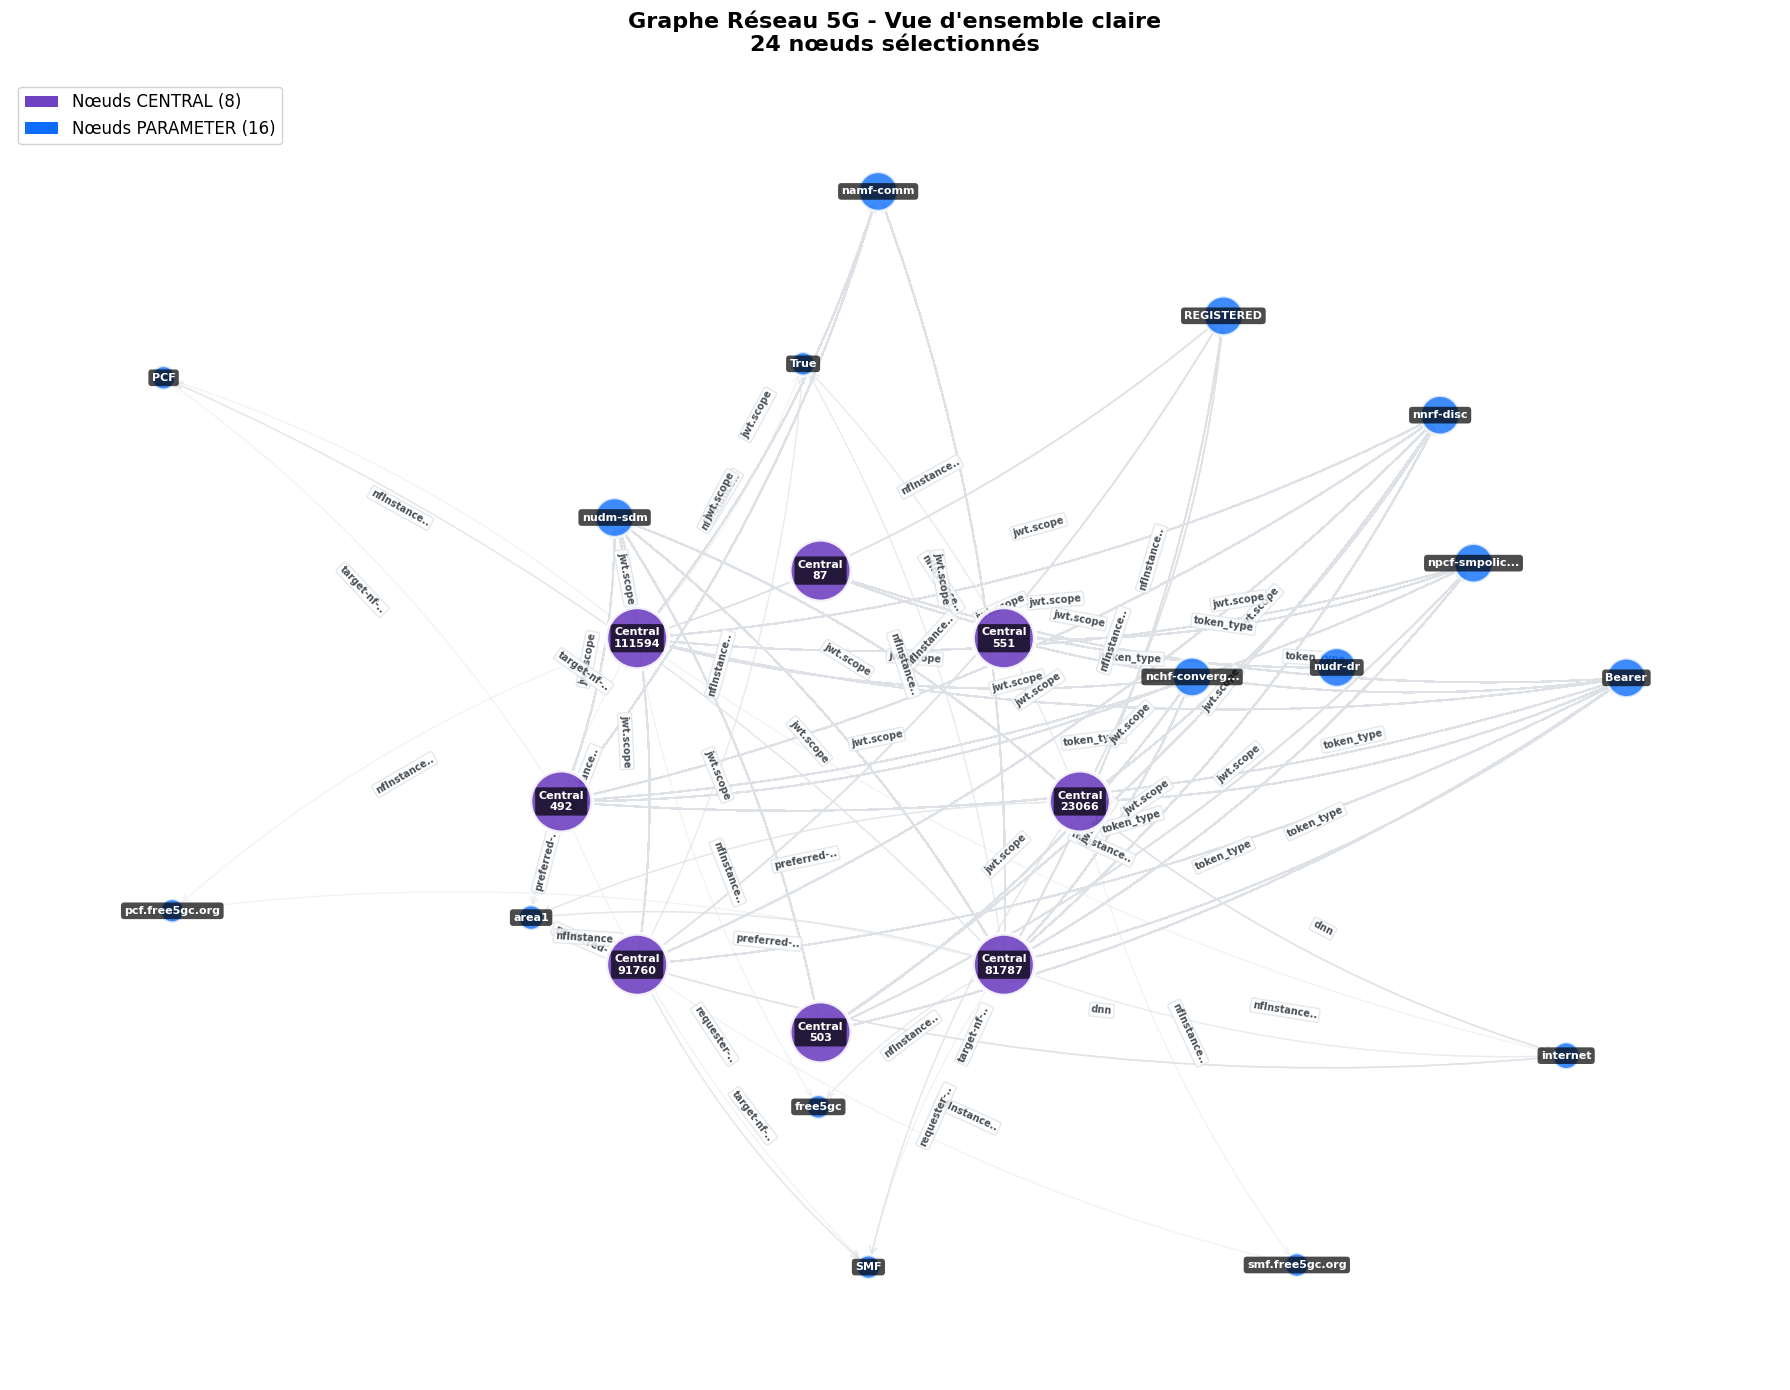

In [20]:
# ========================================
# VISUALISATION CLAIRE DU GRAPHE RÉSEAU
# ========================================

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import random

def create_clean_subgraph(full_graph, max_central=10, max_params_per_central=8):
    """
    Crée un sous-graphe très lisible en sélectionnant intelligemment
    """
    # 1. Sélectionner les nœuds centraux les plus intéressants
    central_nodes = [(n, full_graph.degree(n)) for n, attrs in full_graph.nodes(data=True) 
                    if attrs['node_type'] == 1]
    
    # Trier par degré et prendre les plus connectés
    central_nodes.sort(key=lambda x: x[1], reverse=True)
    selected_centrals = [n for n, _ in central_nodes[:max_central]]
    
    print(f" Sélection de {len(selected_centrals)} nœuds centraux")
    
    # 2. Pour chaque central, prendre ses voisins les plus intéressants
    selected_nodes = set(selected_centrals)
    
    for central in selected_centrals:
        neighbors = list(full_graph.neighbors(central))
        
        # Sélectionner les voisins avec des labels courts et différents
        interesting_neighbors = []
        seen_labels = set()
        
        for neighbor in neighbors:
            label = str(full_graph.nodes[neighbor]['label'])
            
            # Critères de sélection : label court, pas déjà vu, pas timestamp
            if (len(label) < 30 and 
                label not in seen_labels and
                not label.replace('.', '').isdigit() and  # Éviter les timestamps
                len(interesting_neighbors) < max_params_per_central):
                
                interesting_neighbors.append(neighbor)
                seen_labels.add(label)
        
        selected_nodes.update(interesting_neighbors)
    
    # 3. Créer le sous-graphe
    clean_graph = full_graph.subgraph(selected_nodes).copy()
    
    print(f" Sous-graphe créé: {clean_graph.number_of_nodes()} nœuds, {clean_graph.number_of_edges()} arêtes")
    
    return clean_graph

def draw_clear_network(graph, figsize=(18, 14)):
    """
    Dessine un graphe très clair et lisible
    """
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.set_facecolor('#f8f9fa')  # Fond clair
    
    # ========================================
    # POSITIONNEMENT INTELLIGENT
    # ========================================
    
    # Séparer les nœuds par type
    central_nodes = [n for n, attrs in graph.nodes(data=True) if attrs['node_type'] == 1]
    parameter_nodes = [n for n, attrs in graph.nodes(data=True) if attrs['node_type'] == 2]
    
    print(f" Positionnement: {len(central_nodes)} centraux, {len(parameter_nodes)} paramètres")
    
    # Layout hiérarchique : centraux au centre, paramètres autour
    pos = {}
    
    # 1. Placer les centraux en cercle au centre
    if central_nodes:
        center_radius = 2
        for i, node in enumerate(central_nodes):
            angle = 2 * np.pi * i / len(central_nodes)
            pos[node] = (center_radius * np.cos(angle), center_radius * np.sin(angle))
    
    # 2. Placer les paramètres autour de leur central
    placed_params = set()
    
    for central in central_nodes:
        central_pos = pos[central]
        neighbors = [n for n in graph.neighbors(central) if n in parameter_nodes and n not in placed_params]
        
        if neighbors:
            # Rayon autour du central
            param_radius = 4 + random.uniform(-0.5, 0.5)
            
            for i, param in enumerate(neighbors):
                angle = 2 * np.pi * i / len(neighbors) + random.uniform(-0.3, 0.3)  # Petit décalage aléatoire
                param_x = central_pos[0] + param_radius * np.cos(angle)
                param_y = central_pos[1] + param_radius * np.sin(angle)
                pos[param] = (param_x, param_y)
                placed_params.add(param)
    
    # 3. Placer les paramètres restants
    remaining_params = [n for n in parameter_nodes if n not in placed_params]
    if remaining_params:
        remaining_pos = nx.spring_layout({n: None for n in remaining_params}, 
                                       k=3, iterations=50, seed=42)
        for node, (x, y) in remaining_pos.items():
            pos[node] = (x * 8 + 10, y * 8)  # Éloigner du centre
    
    # ========================================
    # DESSINER LES ARÊTES
    # ========================================
    
    # Arêtes fines et discrètes
    nx.draw_networkx_edges(graph, pos, 
                          edge_color='#dee2e6',
                          alpha=0.4,
                          width=1,
                          arrows=True,
                          arrowsize=12,
                          arrowstyle='->',
                          connectionstyle="arc3,rad=0.1")  # Courbes légères
    
    # ========================================
    # DESSINER LES NŒUDS
    # ========================================
    
    # Couleurs plus contrastées
    central_color = '#6f42c1'    # Violet plus foncé
    parameter_color = '#0d6efd'  # Bleu plus foncé
    
    # Tailles basées sur le degré mais plus modérées
    def get_node_size(node):
        degree = graph.degree(node)
        node_type = graph.nodes[node]['node_type']
        if node_type == 1:  # Central
            return max(800, min(2000, degree * 40))
        else:  # Parameter
            return max(300, min(800, degree * 30))
    
    # Nœuds centraux
    if central_nodes:
        central_sizes = [get_node_size(n) for n in central_nodes]
        nx.draw_networkx_nodes(graph, pos,
                              nodelist=central_nodes,
                              node_color=central_color,
                              node_size=central_sizes,
                              alpha=0.9,
                              edgecolors='white',
                              linewidths=3)
    
    # Nœuds paramètres
    if parameter_nodes:
        param_sizes = [get_node_size(n) for n in parameter_nodes]
        nx.draw_networkx_nodes(graph, pos,
                              nodelist=parameter_nodes,
                              node_color=parameter_color,
                              node_size=param_sizes,
                              alpha=0.8,
                              edgecolors='white',
                              linewidths=2)
    
    # ========================================
    # LABELS CLAIRS ET LISIBLES
    # ========================================
    
    # Labels pour TOUS les nœuds mais intelligents
    node_labels = {}
    
    for node, attrs in graph.nodes(data=True):
        if attrs['node_type'] == 1:  # Central
            node_labels[node] = f"Central\n{node}"
        else:  # Parameter
            label = str(attrs['label'])
            # Raccourcir les labels trop longs
            if len(label) > 15:
                label = label[:12] + "..."
            node_labels[node] = label
    
    # Dessiner les labels des nœuds avec un bon contraste
    nx.draw_networkx_labels(graph, pos,
                           labels=node_labels,
                           font_size=8,
                           font_color='white',
                           font_weight='bold',
                           bbox=dict(boxstyle="round,pad=0.3", 
                                   facecolor='black', 
                                   alpha=0.7,
                                   edgecolor='none'))
    
    # ========================================
    # LABELS DES ARÊTES (NOUVELLEMENT AJOUTÉ)
    # ========================================
    
    # Préparer les labels des arêtes
    edge_labels = {}
    for u, v, attrs in graph.edges(data=True):
        edge_label = attrs.get('label', '')
        # Raccourcir les labels d'arêtes trop longs
        if len(edge_label) > 12:
            edge_label = edge_label[:10] + ".."
        edge_labels[(u, v)] = edge_label
    
    # Dessiner les labels des arêtes
    nx.draw_networkx_edge_labels(graph, pos,
                                 edge_labels=edge_labels,
                                 font_size=7,
                                 font_color='#495057',
                                 font_weight='bold',
                                 bbox=dict(boxstyle="round,pad=0.2", 
                                         facecolor='white', 
                                         alpha=0.8,
                                         edgecolor='#dee2e6'))
    
    # ========================================
    # TITRE ET LÉGENDE
    # ========================================
    
    plt.title("Graphe Réseau 5G - Vue d'ensemble claire\n"
              f"{graph.number_of_nodes()} nœuds sélectionnés",
              fontsize=16, fontweight='bold', pad=20)
    
    # Légende améliorée
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=central_color, label=f'Nœuds CENTRAL ({len(central_nodes)})'),
        Patch(facecolor=parameter_color, label=f'Nœuds PARAMETER ({len(parameter_nodes)})')
    ]
    plt.legend(handles=legend_elements, loc='upper left', 
              fontsize=12, framealpha=0.9)
    
    # Supprimer les axes
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ========================================
# ANALYSE DU CONTENU AVANT VISUALISATION
# ========================================

def analyze_graph_content(graph):
    """Analyse le contenu pour comprendre ce qu'on visualise"""
    
    print(" ANALYSE DU CONTENU DU GRAPHE")
    print("=" * 50)
    
    # Analyser les labels des paramètres
    param_labels = []
    for node, attrs in graph.nodes(data=True):
        if attrs['node_type'] == 2:
            param_labels.append(str(attrs['label']))
    
    # Catégoriser les labels
    categories = {
        'IPs': [l for l in param_labels if any(x in l.lower() for x in ['ip', '10.', '192.', '172.'])],
        'Ports': [l for l in param_labels if l.isdigit() and 0 < int(l) < 65536],
        'Methods': [l for l in param_labels if l.upper() in ['GET', 'POST', 'PUT', 'DELETE', 'PATCH']],
        'Protocols': [l for l in param_labels if any(x in l.lower() for x in ['tcp', 'udp', 'http', 'tls'])],
        'JWT': [l for l in param_labels if 'jwt' in l.lower()],
        'Timestamps': [l for l in param_labels if l.replace('.', '').isdigit() and len(l) > 10],
        'Services': [l for l in param_labels if any(x in l.lower() for x in ['service', 'instance', 'nf'])],
        'Other': []
    }
    
    # Classer le reste
    for label in param_labels:
        if not any(label in cat for cat in categories.values()):
            categories['Other'].append(label)
    
    print(" CATÉGORIES DE DONNÉES TROUVÉES:")
    for cat, items in categories.items():
        if items:
            print(f"   - {cat}: {len(items)} éléments")
            if len(items) <= 3:
                print(f"     Exemples: {items}")
            else:
                print(f"     Exemples: {items[:3]}...")

# ========================================
# EXÉCUTION
# ========================================

print(" CRÉATION D'UNE VISUALISATION CLAIRE")
print("=" * 50)

# Analyser le contenu d'abord
analyze_graph_content(graph)

# Créer un sous-graphe lisible
clear_graph = create_clean_subgraph(graph, max_central=8, max_params_per_central=6)

# Visualiser
print(f"\n  GÉNÉRATION DE LA VISUALISATION...")
print(f"Sous-graphe: {clear_graph.number_of_nodes()} nœuds sur {graph.number_of_nodes()} total")
draw_clear_network(clear_graph)